
<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#e06666" size=8px>
                    <b> IRIS FLOWER CLASSIFICATION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

plt.style.use("fivethirtyeight")

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

#Model Selection:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, r2_score, recall_score, confusion_matrix

**Import Data-Set**

In [55]:
iris=pd.read_csv("iris.csv")

In [56]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [57]:
iris.shape

(150, 5)

In [58]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- There are total 150 rows and 5 columns in the dataset.
- In 5 columns there are 4 numerical columns and 1 categorical columns in the dataset 
- The total memory usage is arroud 6.0+ KB.

In [59]:
iris.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepallength,150.000000,NaN,NaN,NaN,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepalwidth,150.000000,NaN,NaN,NaN,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
petallength,150.000000,NaN,NaN,NaN,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
petalwidth,150.000000,NaN,NaN,NaN,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000
class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Null-value Treatment**

In [60]:
iris.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [61]:
iris.duplicated().sum()

3

In [62]:
iris.drop_duplicates(inplace=True)

**Outlier Treatment**

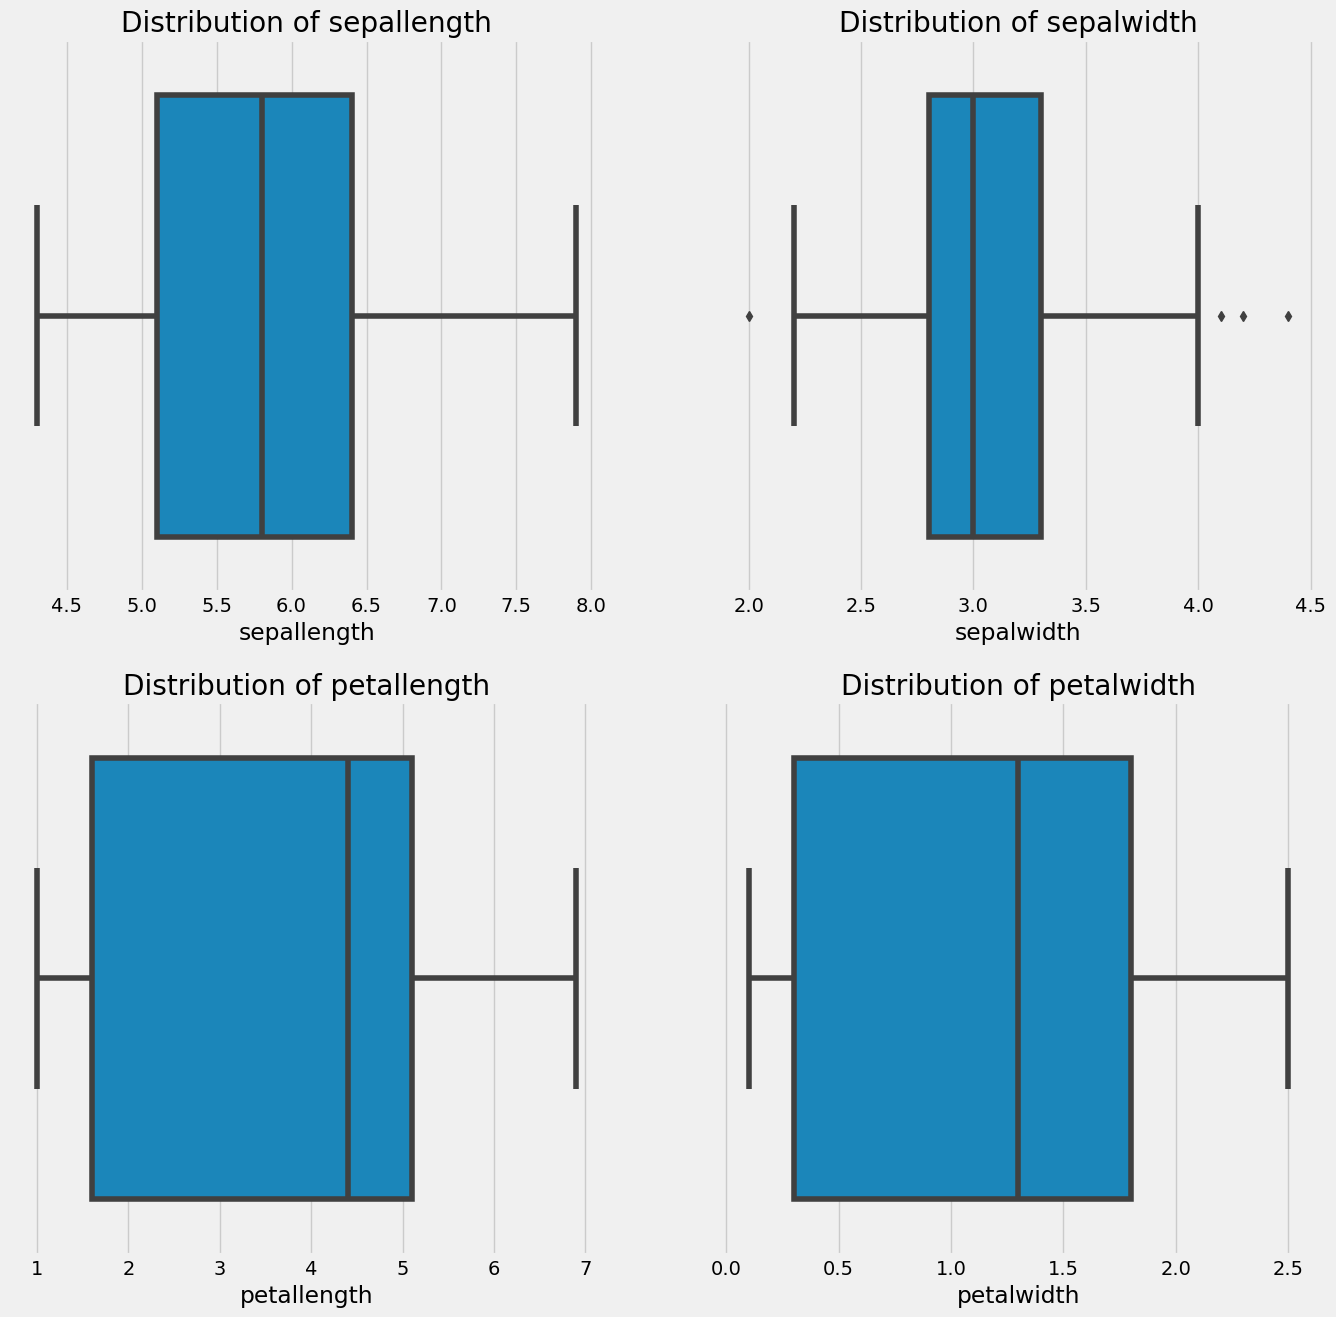

In [90]:
a=1
plt.figure(figsize=(15,15))
for i in ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']:
    plt.subplot(2,2, a)
    sns.boxplot(iris[i])
    plt.title(f"Distribution of {i}")
    a+=1

- Sepal-width have some outlier hence we will remove them.

**Sepal-width**

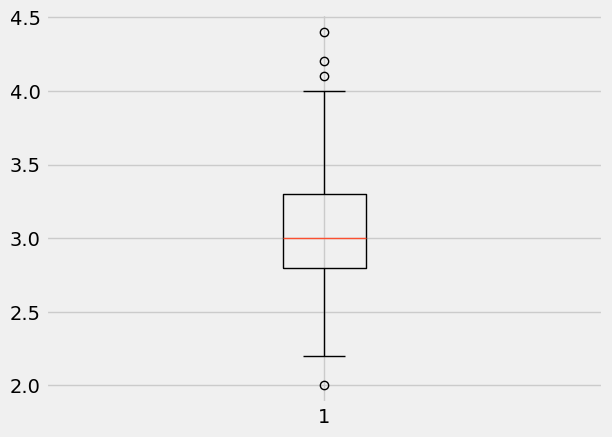

In [92]:
x=plt.boxplot(iris["sepalwidth"])

In [94]:
[i.get_ydata() for i in x["caps"]]

[array([2.2, 2.2]), array([4., 4.])]

In [96]:
iris=iris[(iris.sepalwidth>=2.2) & (iris.sepalwidth <=4.)]

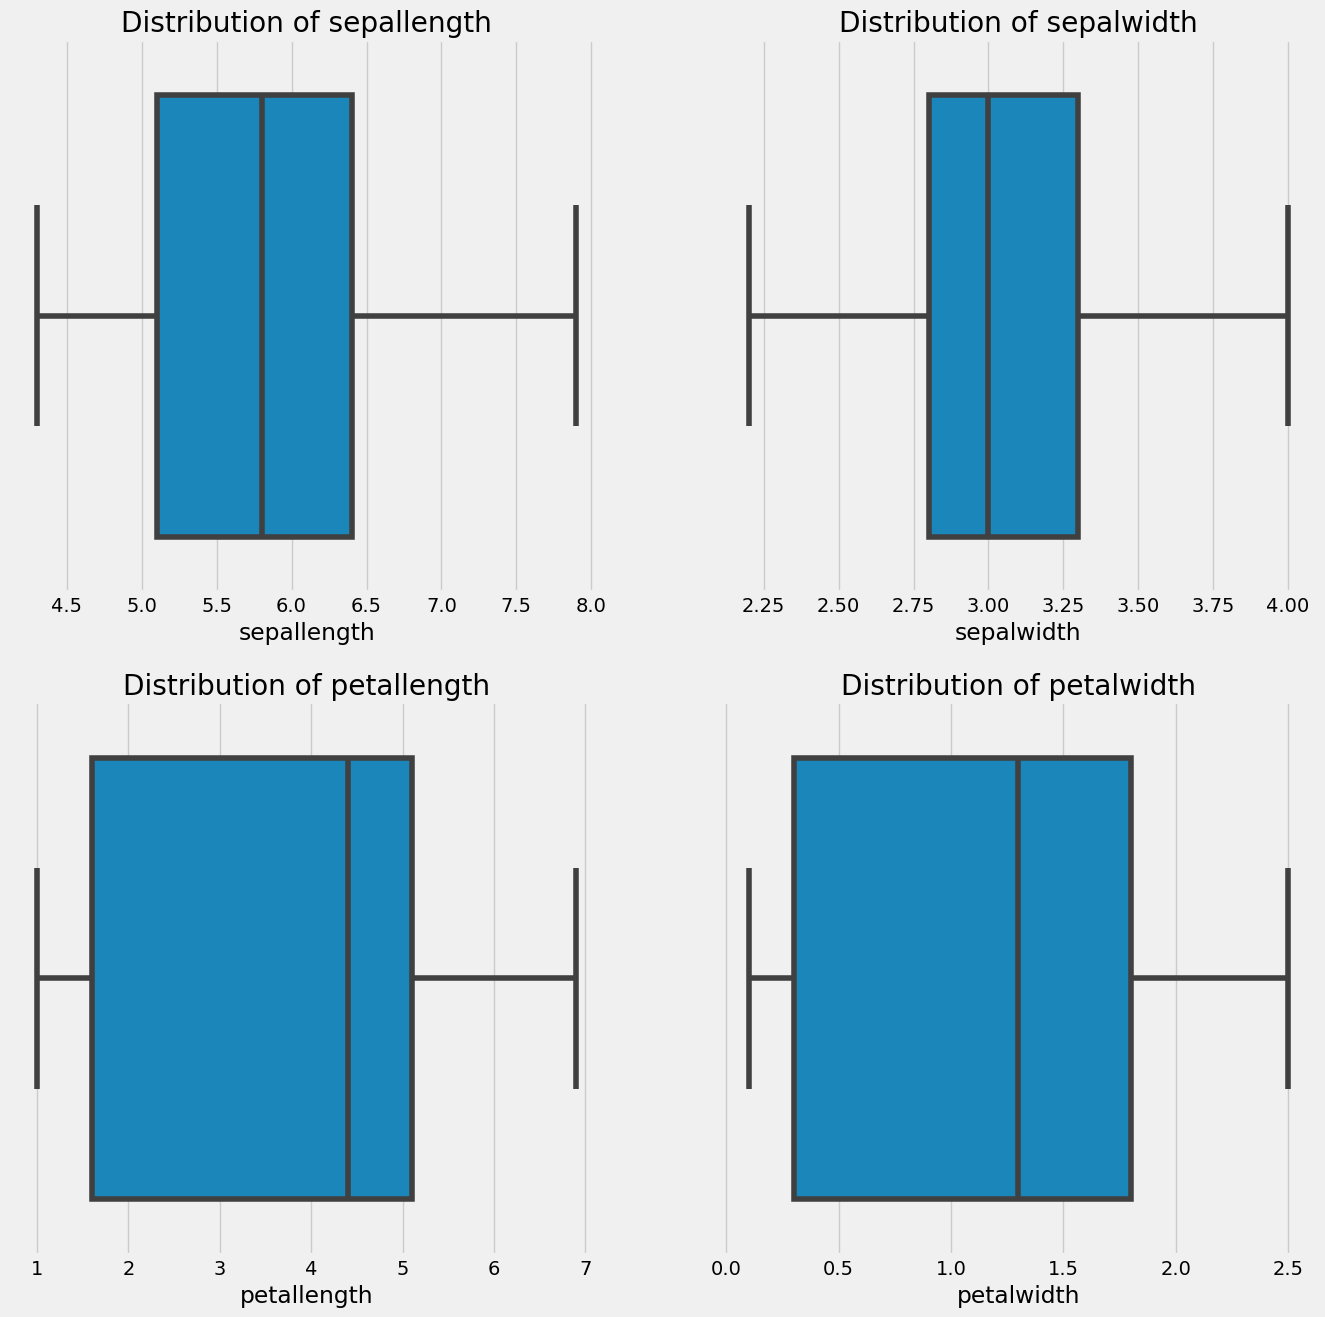

In [97]:
a=1
plt.figure(figsize=(15,15))
for i in ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']:
    plt.subplot(2,2, a)
    sns.boxplot(iris[i])
    plt.title(f"Distribution of {i}")
    a+=1

**EDA : Exploratory Data Analysis**

In [98]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


**Class**

<AxesSubplot:xlabel='class', ylabel='count'>

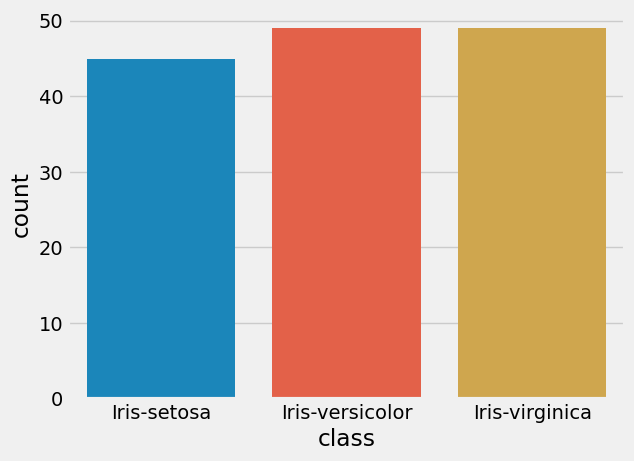

In [99]:
sns.countplot(data=iris, x="class")

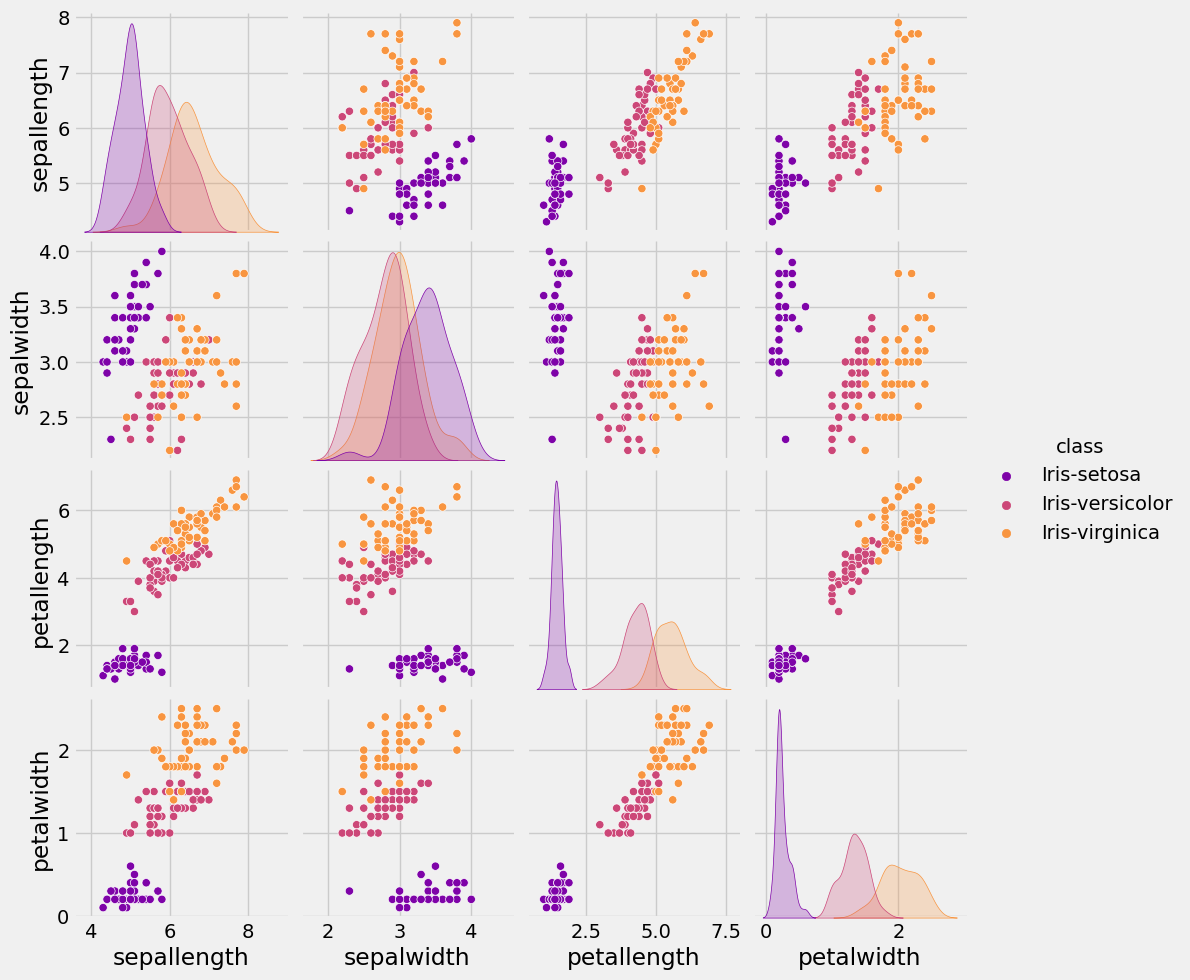

In [100]:
sns.pairplot(iris, hue="class", palette="plasma", kind="scatter" )

In [101]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

<AxesSubplot:xlabel='sepallength', ylabel='Count'>

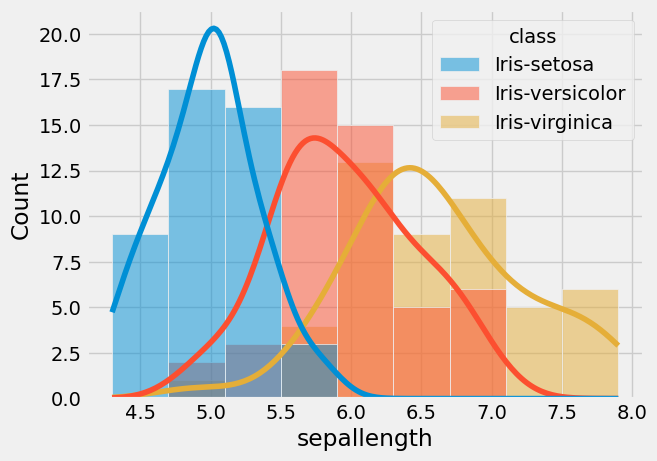

In [102]:
sns.histplot( x= iris["sepallength"], hue= iris["class"], kde=True)

Iris-setosa
Iris-versicolor
Iris-virginica


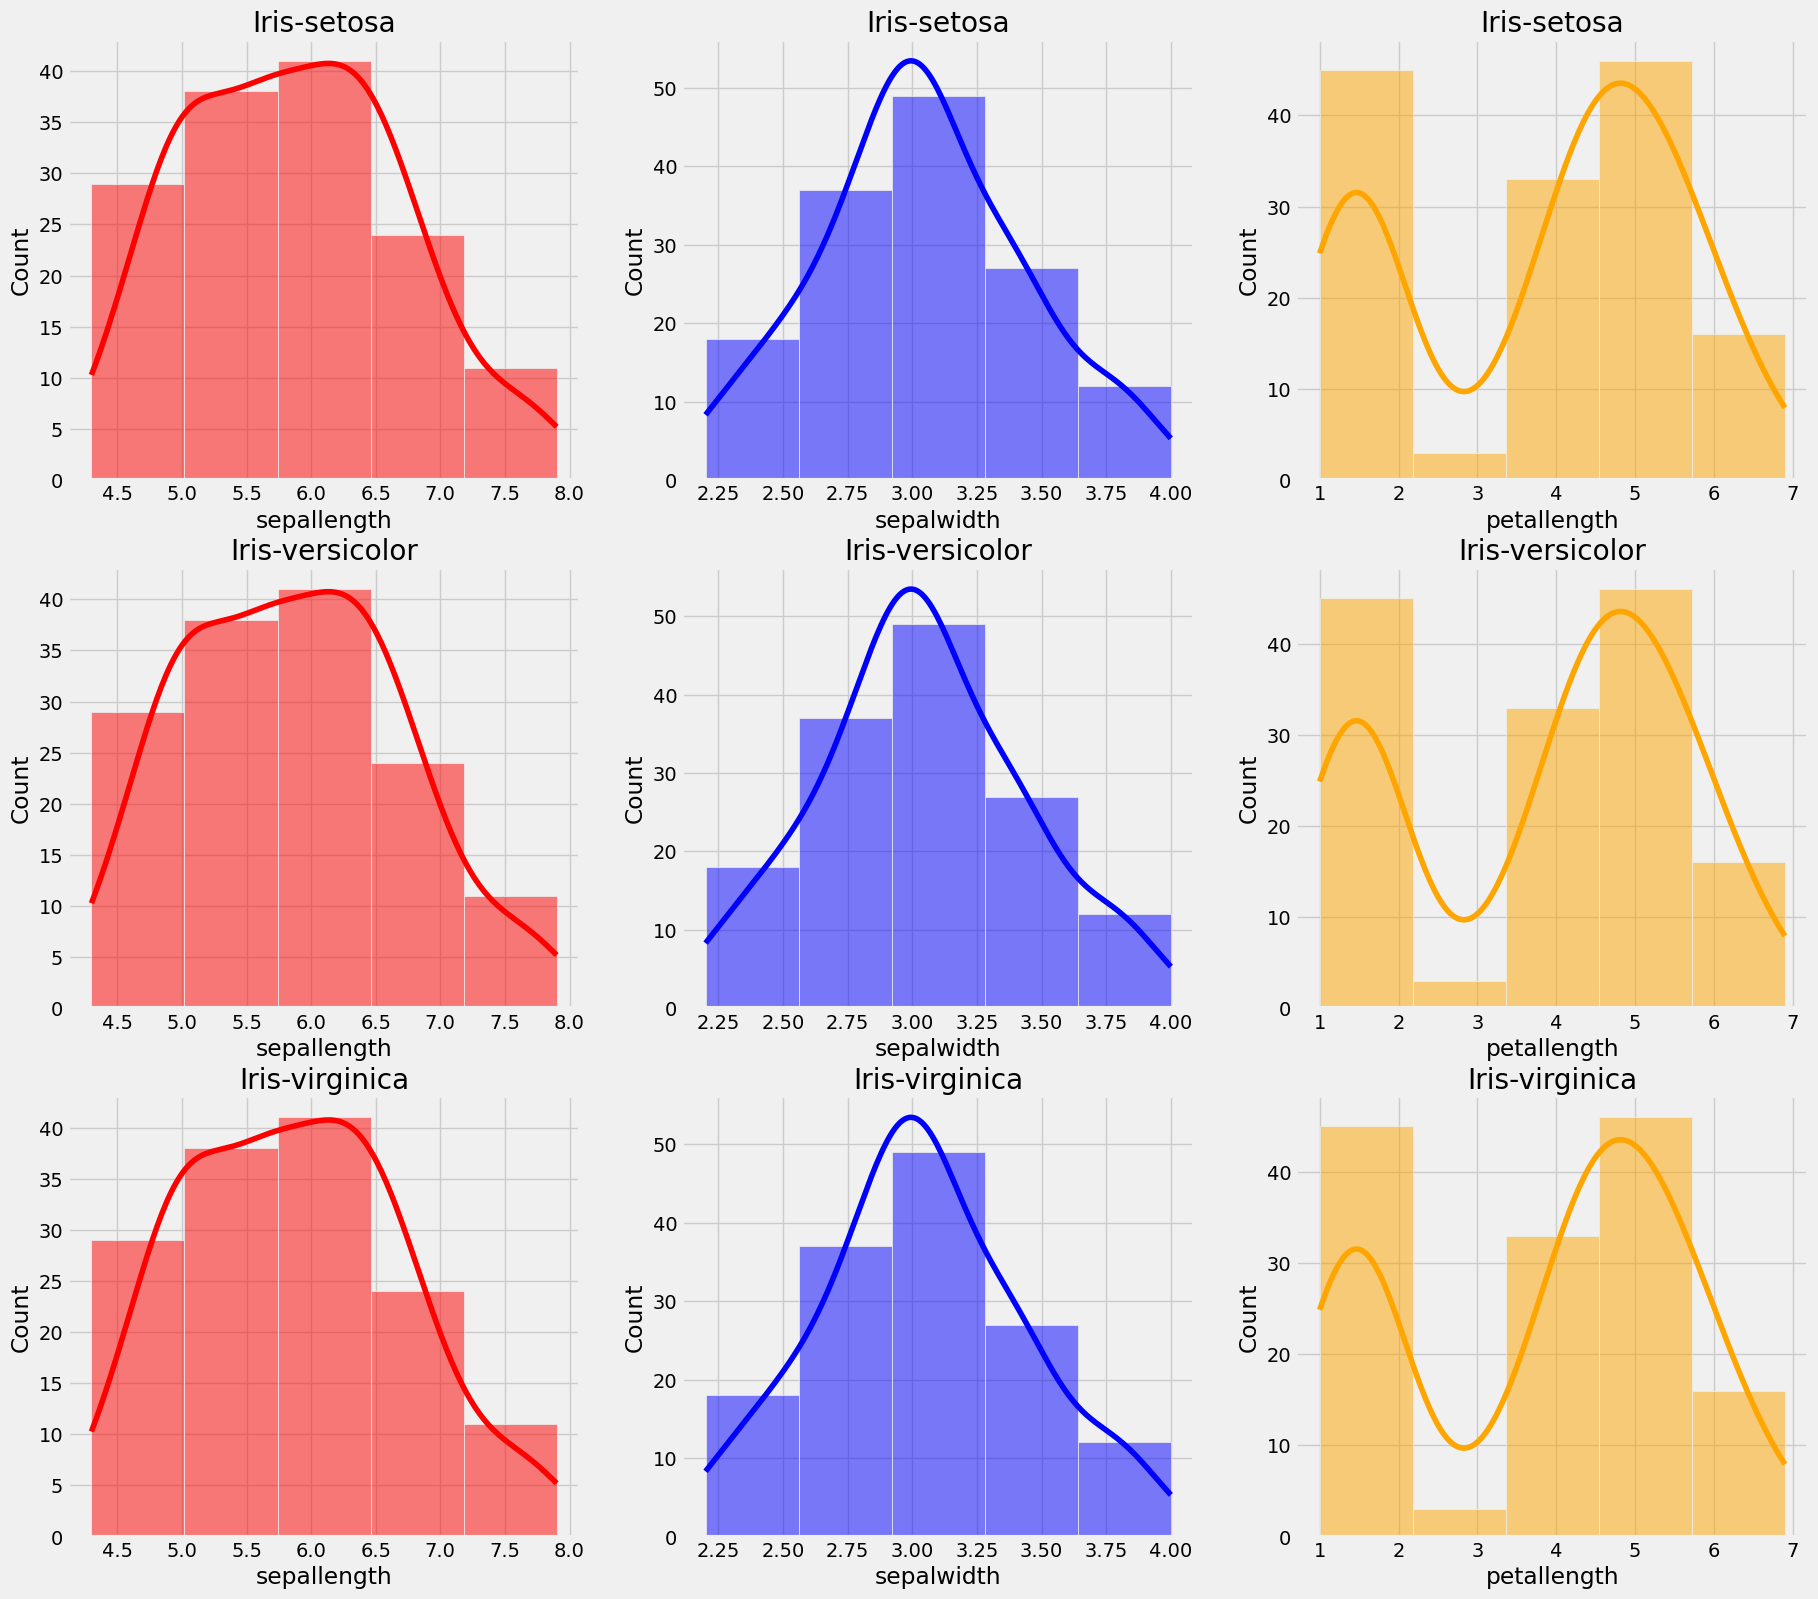

In [103]:
count=1
plt.figure(figsize=(20,25))
for j in iris['class'].unique():
    print(j)
    
    df=iris[iris['class']==j]
    
    for i,k in zip(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], ["red", "blue", "orange"]):
        plt.subplot(4,3,count)
        sns.histplot( x= iris[i], kde=True, color=k, bins=5)
        plt.title(j)
        count+=1
    

**Encoding and Scaling**
- All the independent variable are in numerical form and lie under same scale hence there is no need for Scaling and Encoding in the data.

**Train-Test Split**

In [104]:
#Seperate Independent and Dependent Variable
y=iris["class"]
X=iris.drop(columns="class")

In [105]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [106]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


In [107]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=120)

In [108]:
print(X_train.shape)
X_train.head()

(114, 4)


,sepallength,sepalwidth,petallength,petalwidth
61,5.900000,3.000000,4.200000,1.500000
40,5.000000,3.500000,1.300000,0.300000
47,4.600000,3.200000,1.400000,0.200000
146,6.300000,2.500000,5.000000,1.900000
108,6.700000,2.500000,5.800000,1.800000


In [109]:
print(X_test.shape)
X_test.head()

(29, 4)


,sepallength,sepalwidth,petallength,petalwidth
107,7.300000,2.900000,6.300000,1.800000
19,5.100000,3.800000,1.500000,0.300000
99,5.700000,2.800000,4.100000,1.300000
69,5.600000,2.500000,3.900000,1.100000
17,5.100000,3.500000,1.400000,0.300000


In [110]:
print(y_train.shape)
y_train.head()

(114,)


61     Iris-versicolor
40         Iris-setosa
47         Iris-setosa
146     Iris-virginica
108     Iris-virginica
Name: class, dtype: object

In [111]:
print(y_test.shape)
y_test.head()

(29,)


107     Iris-virginica
19         Iris-setosa
99     Iris-versicolor
69     Iris-versicolor
17         Iris-setosa
Name: class, dtype: object

**Model Buliding**

In [112]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [113]:
log_model.predict(X_train)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-v

In [114]:
#Evaluate 

In [115]:
predicted=log_model.predict(X_test)

In [116]:
Eval_df=pd.DataFrame({"Actual": y_test, "Predicted": predicted})

In [117]:
Eval_df

,Actual,Predicted
107,Iris-virginica,Iris-virginica
19,Iris-setosa,Iris-setosa
99,Iris-versicolor,Iris-versicolor
69,Iris-versicolor,Iris-versicolor
17,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
43,Iris-setosa,Iris-setosa
72,Iris-versicolor,Iris-versicolor
45,Iris-setosa,Iris-setosa


In [118]:
Accuracy=accuracy_score(y_test, predicted)
Accuracy

0.9655172413793104

- The Accuracy of the model is arrounf 97%.
- The model predict the correct value. 
